## Clustering

Objetivo: Categorizar los países utilizando factores socioeconómicos y sanitarios que determinan el desarrollo global del país.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles

# Cargamos el conjunto de datos
ngo = pd.read_csv('./Country-data.csv')
ngo.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [44]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


A partir de la información anterior, todos los datos tienen tipo correcto.

In [45]:
desc = pd.read_csv(r"./data-dictionary.csv")
desc.head(len(desc))

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [46]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [47]:
# Comprobamos el % de datos ausentes por columna
round(100*(ngo.isnull().sum()/len(ngo.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Podemos obsservar que no hay datos ausentes (null, NaN, NA) en la lista.

Comprobemos ahora los datos atípicos.

<Axes: xlabel='gdpp'>

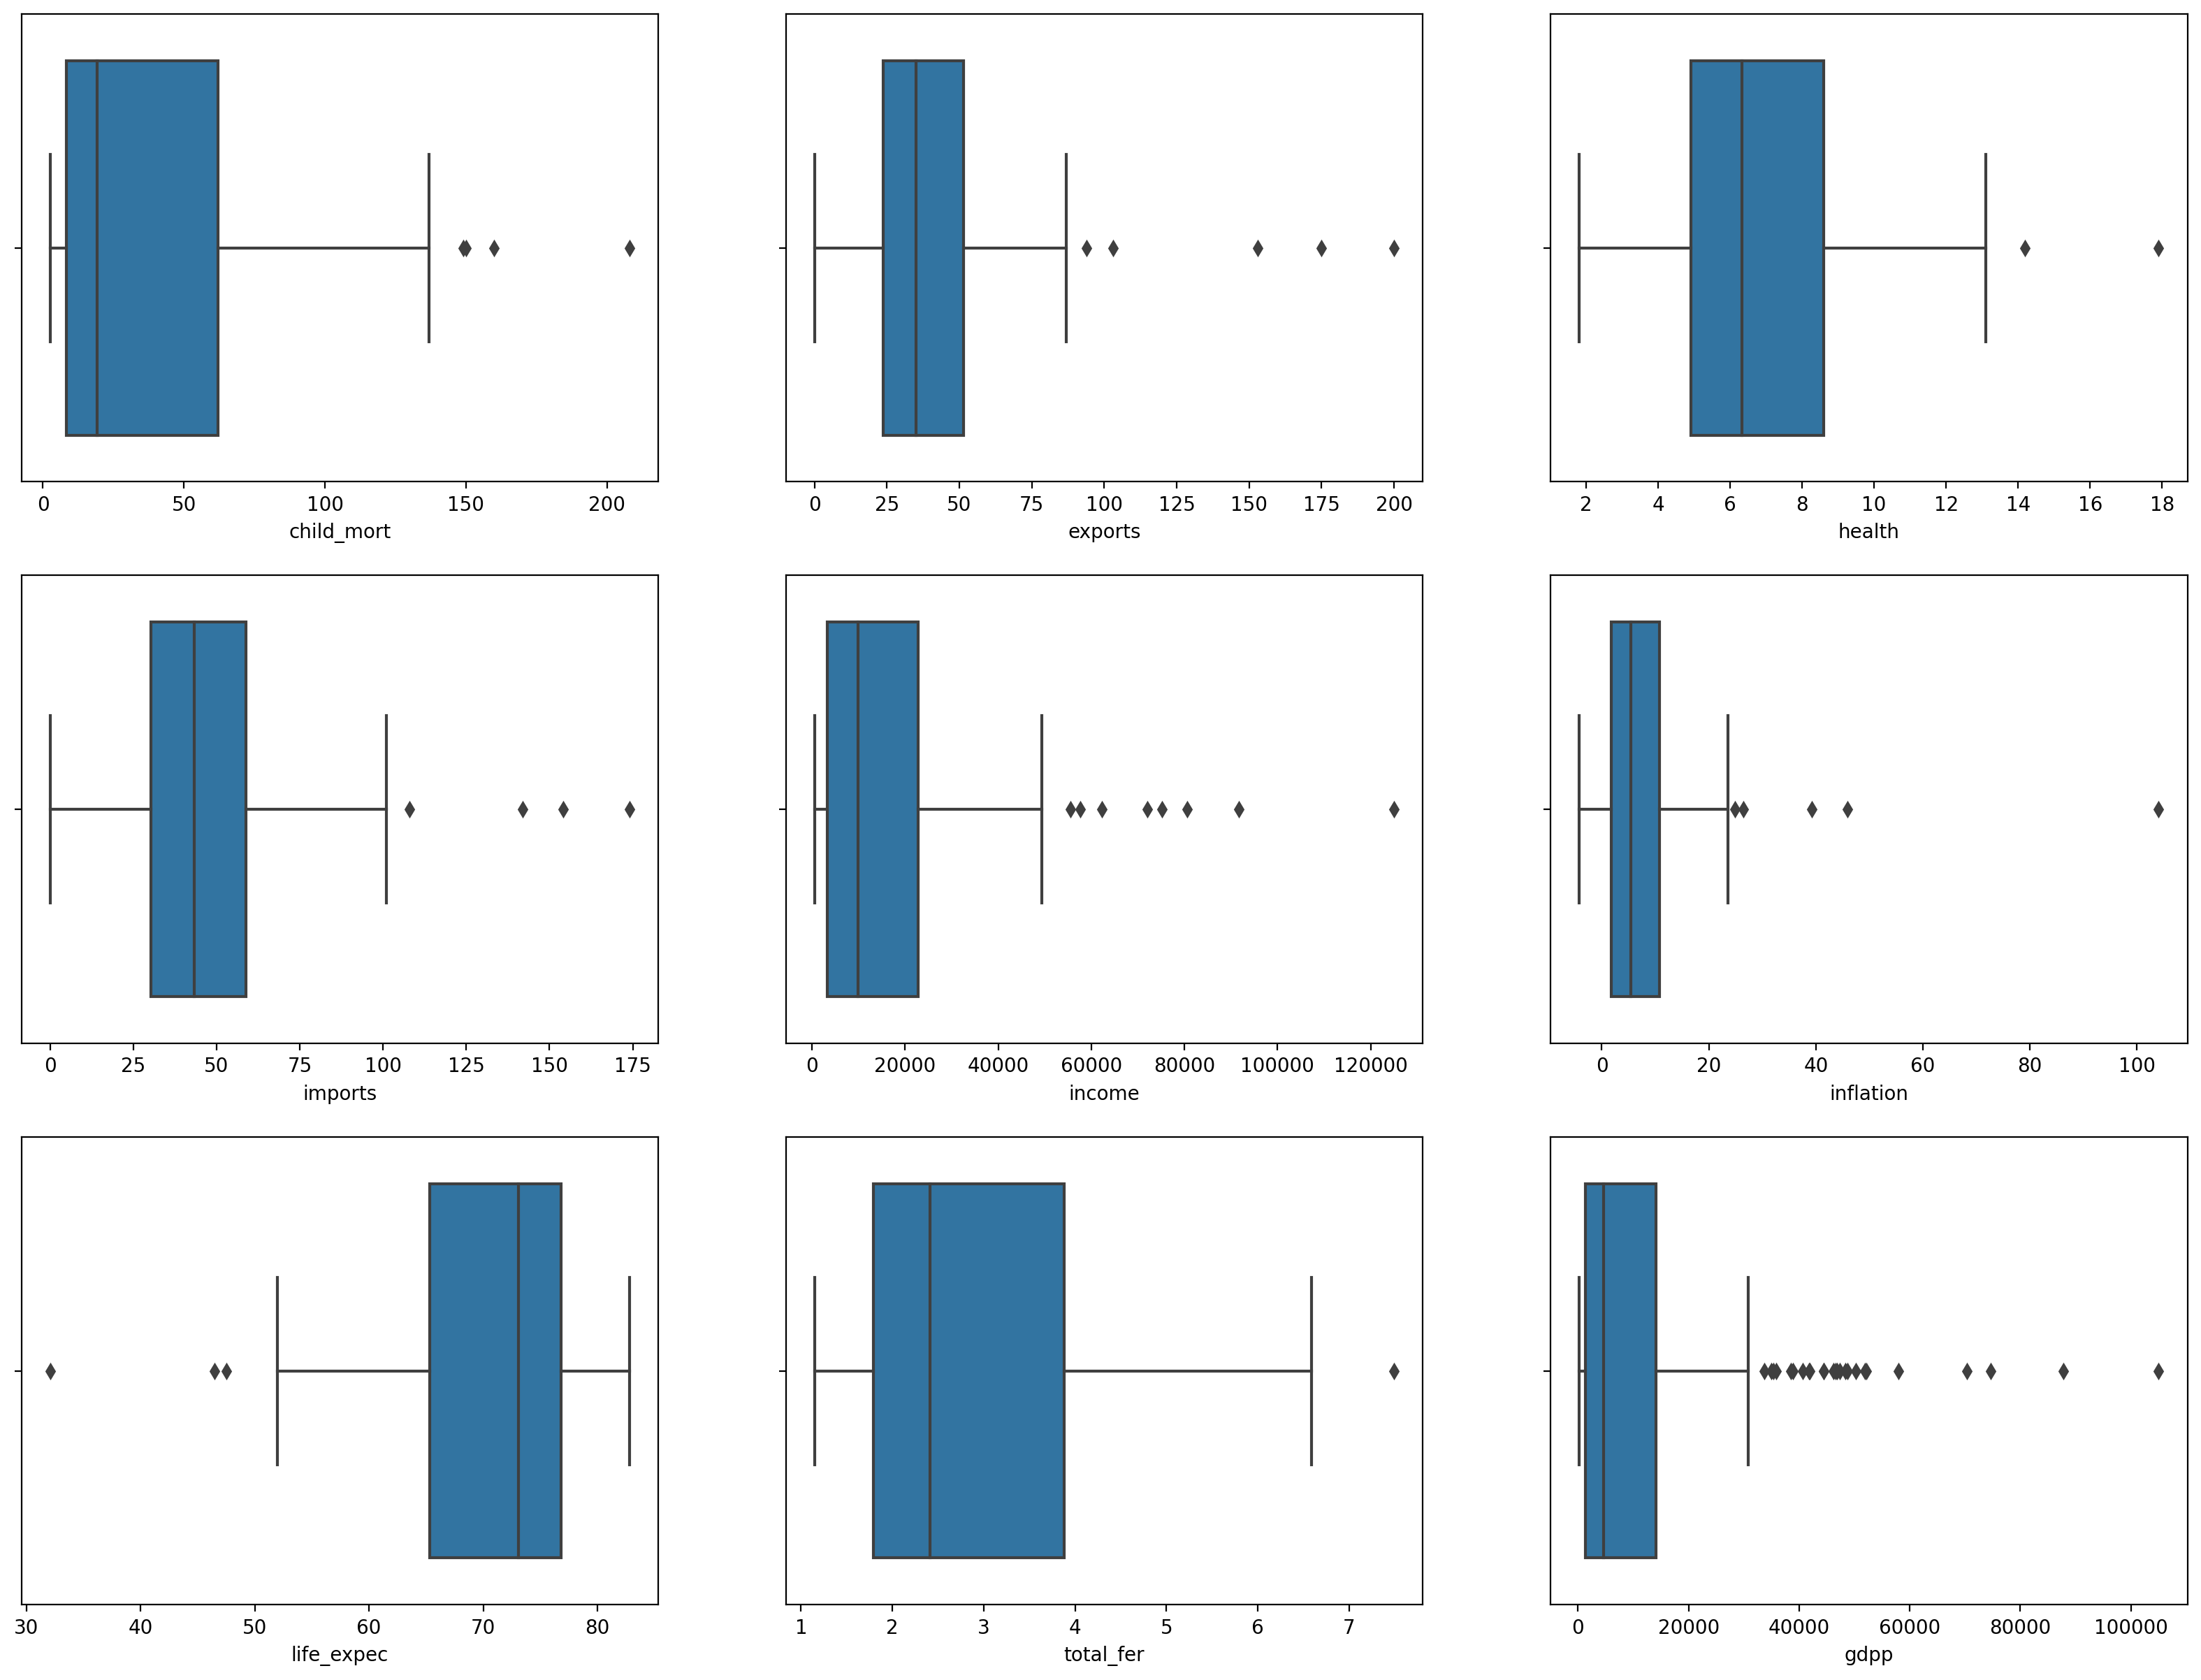

In [48]:
# Comprobamos los valores atípicos mediante un box-plot.

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = ngo)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = ngo)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = ngo)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = ngo)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = ngo)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = ngo)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = ngo)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = ngo)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = ngo)

A partir de los box plots anteriores, podemos observar que hay varios datos atípicos, como p.ej. exports, imports, income, gdpp, etc. 

Antes de tratar los valores atípicos, veamos si hay correlación entre los datos. 

/var/folders/h1/qhdsmv691s1bjvzmz1_f28340000gn/T/ipykernel_31981/2595835149.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ngo.corr(),annot = True)


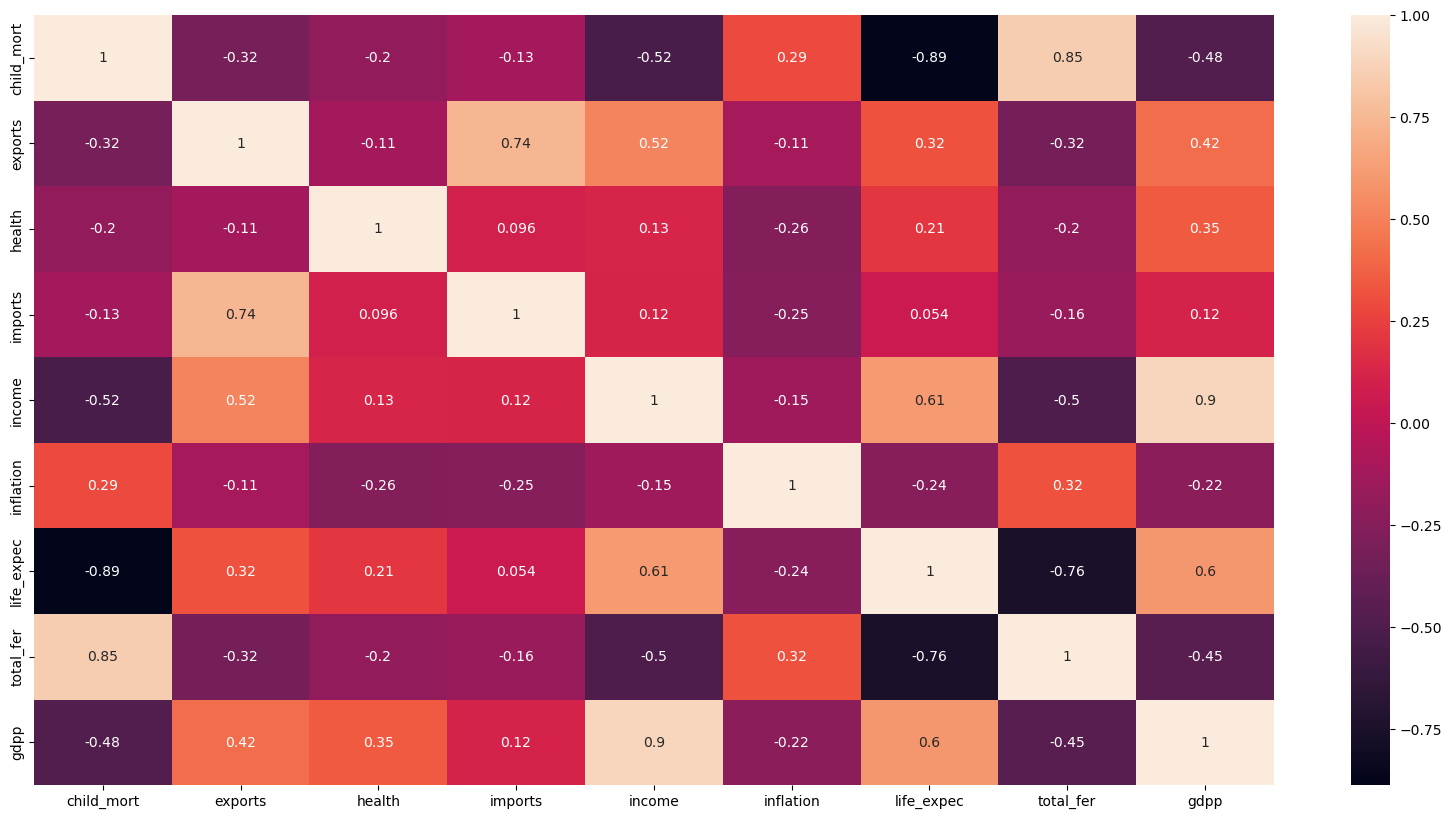

In [58]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(ngo.corr(),annot = True)
plt.show()

Podemos ver que: 
- imports y exports están fuertemente correlacionadas 
- imports, exports, health, income están fuertemente correlacionadas con gdpp. 

Para tratar la correlación entre las variables y el ruido vamos a usar la técnica del PCA:
- El PCA es una técnica pensada para busca la correlación inherente entre las variables y que a simple vista pueda habérsenos pasado(normalmente entre muchas variables). Los componentes principales son precisamente los elementos que reflejan esta correlación. 
- El PCA se usa también para tratar el ruido (además de reducir la dimensionalidad). No elimina el ruido, pero lo reduce. 

Antes de aplicar el PCA, preparemos el conjunto de datos. Primero, eliminemos la columna country (categórica):

In [50]:
# Eliminamos la columna country para q el dataset contenga únicamente datos numéricos

ngo_drop = ngo.copy()
country = ngo_drop.pop('country')


A continuación, reescalemos los datos. Muchos de los algoritmos de PCA asumen que los datos están centrados y escalados, por ello es importante hacer este paso previo antes de aplicarlo. 

In [51]:
# Estandarizamos vía z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)

Aplicamos el PCA porque queremos eliminar las redundancias de los datos y encontrar las direcciones en las que los datos se alinean. 
Además de los mencionado anteriormente, al convertir grandes conjuntos de datos en otros más pequeños que contienen menos variables se ayuda a mejorar el rendimiento de los modelos y a visualizar dichos conjuntos.

Utilicemos PCA para reducir la dimensionalidad, ya que el mapa de calor muestra que existe correlación entre los atributos.


In [52]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=50)
pca.fit(ngo_scaled)

# Ratios de varianza
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

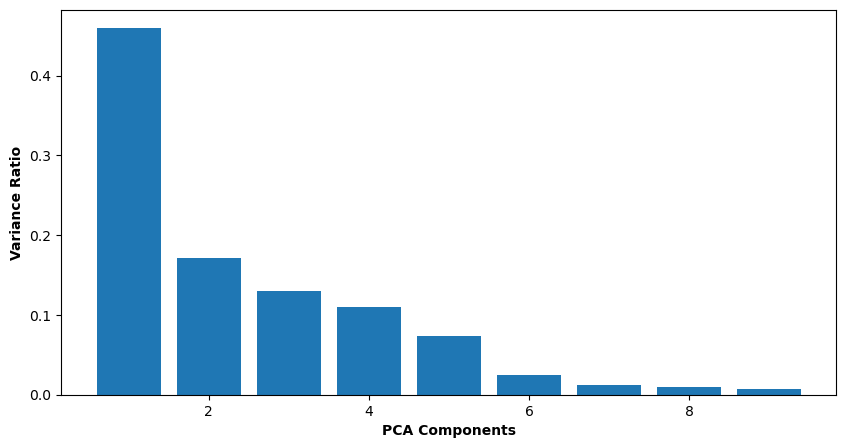

In [53]:
# Ratio de varianza para cada componente PCA.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

Se puede observar que con el primer componente, la varianza queda explicada en casi un 45%. 
Con el segundo componente, la varianza queda explicada en cerca del 17%.

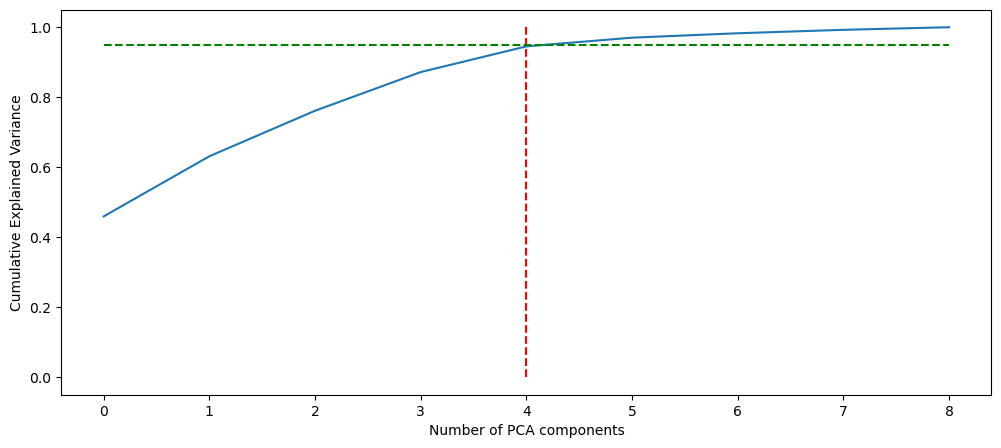

In [54]:
# Gráfica para visualizar la varianza acumulada en base a los componentes
fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

A partir del gráfico anterior, podemos ver que más del 95% de la varianza está explicada a partir de los 4 primeros componentes. Por esta razón, utilizaremos únicamente estos componentes a partir de este punto. 

In [55]:
# Comprobemos si los atributos están correctamente explicados con los componentes PCA
org_col = list(ngo.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})
print(attributes_pca)

    Attribute      PC_1      PC_2      PC_3
0  child_mort -0.419519  0.192884 -0.029544
1     exports  0.283897  0.613163  0.144761
2      health  0.150838 -0.243087 -0.596632
3     imports  0.161482  0.671821 -0.299927
4      income  0.398441  0.022536  0.301548
5   inflation -0.193173 -0.008404  0.642520
6  life_expec  0.425839 -0.222707  0.113919
7   total_fer -0.403729  0.155233  0.019549
8        gdpp  0.392645 -0.046022  0.122977


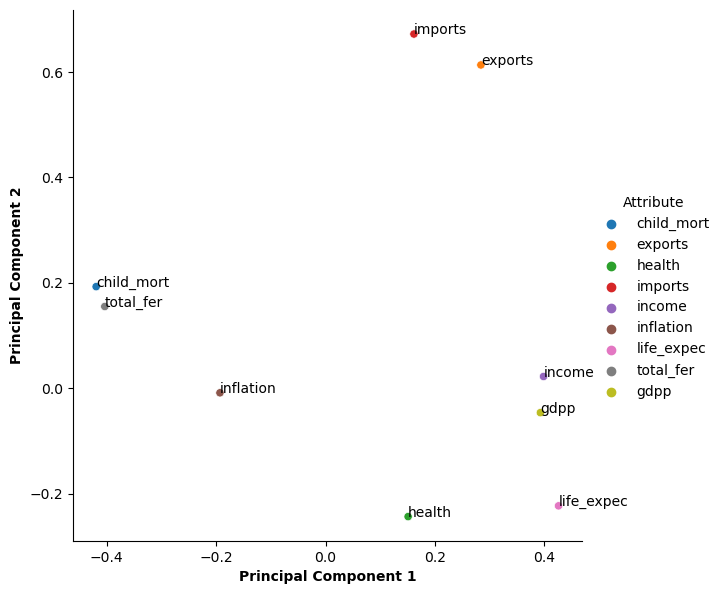

In [56]:
# Representemos gráficamente el dataframe anterior para visualizar mejor las componentes PC1 y PC2
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=6)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

Inflación no queda explicada por PC1 y PC2. Las demás variables quedan bien explicadas. 

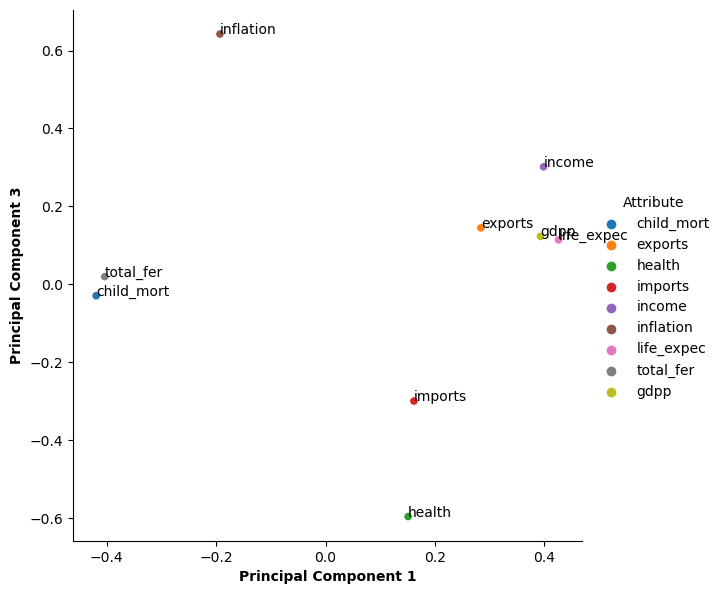

In [57]:
# Representemos gráficamente el dataframe anterior para visualizar mejor las componentes PC1 y PC3
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=6)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

Inflación sí que queda bien representada por PC1 y PC3.

Ya que el 95% de la varianza queda explicada por 4 componentes principales, construyamos el conjunto de datos a partir de esos componentes.

In [157]:
# Podemos construir el dataframe usando IncrementalPCA
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=4)

# Ajustamos el conjunto de datos escalado con el pca incremental
df_inc_pca = inc_pca.fit_transform(ngo_scaled)

# Creamos el nuevo dataframe
df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3","PC_4"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.head()


,country,PC_1,PC_2,PC_3,PC_4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,Angola,-2.930969,1.699437,-1.521734,0.875966
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808



Veamos como queda el conjunto de datos con un mapa de calor, y de paso comprobemos si sigue habiendo alguna dependencia. 

/var/folders/h1/qhdsmv691s1bjvzmz1_f28340000gn/T/ipykernel_31981/3605621834.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='winter')


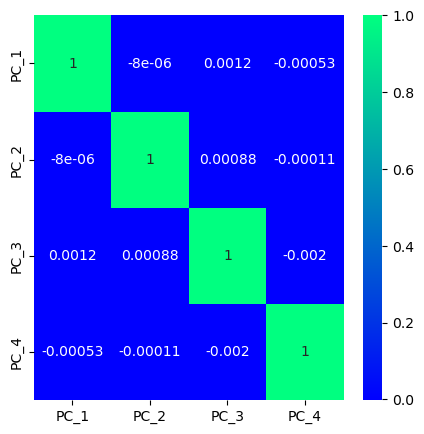

In [60]:
plt.figure(figsize = (5,5))        
ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='winter')

In [ ]:
Podemos observar que la correlación entre los atributos es prácticamente 0. Podemos entonces proceder con el siguiente paso. 
Antes, visualicemos los datos. 

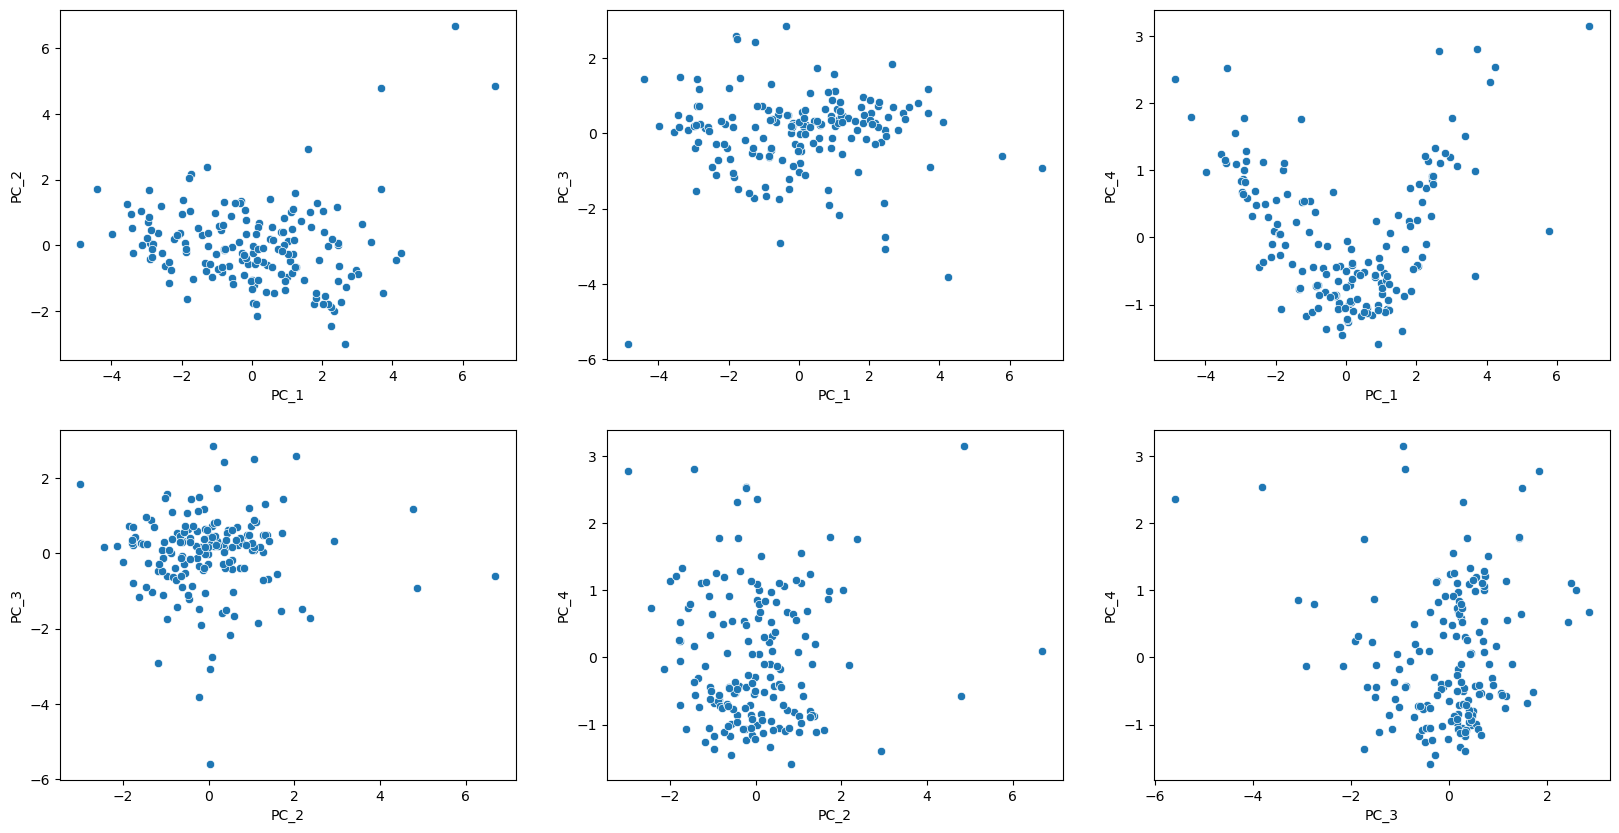

In [64]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(2,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(2,3,3)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_4')
plt.subplot(2,3,4)
sns.scatterplot(data=df_pca_final, x='PC_2', y='PC_3')
plt.subplot(2,3,5)
sns.scatterplot(data=df_pca_final, x='PC_2', y='PC_4')
plt.subplot(2,3,6)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_4')
plt.show()

Comprobemos ahora si el PCA lidió con los valores atípicos o es necesario aplicar alguna técnica adicional. Para ello, primero visualizaremos las columnas aplicando la técnica del violín.

<Axes: xlabel='PC_4'>

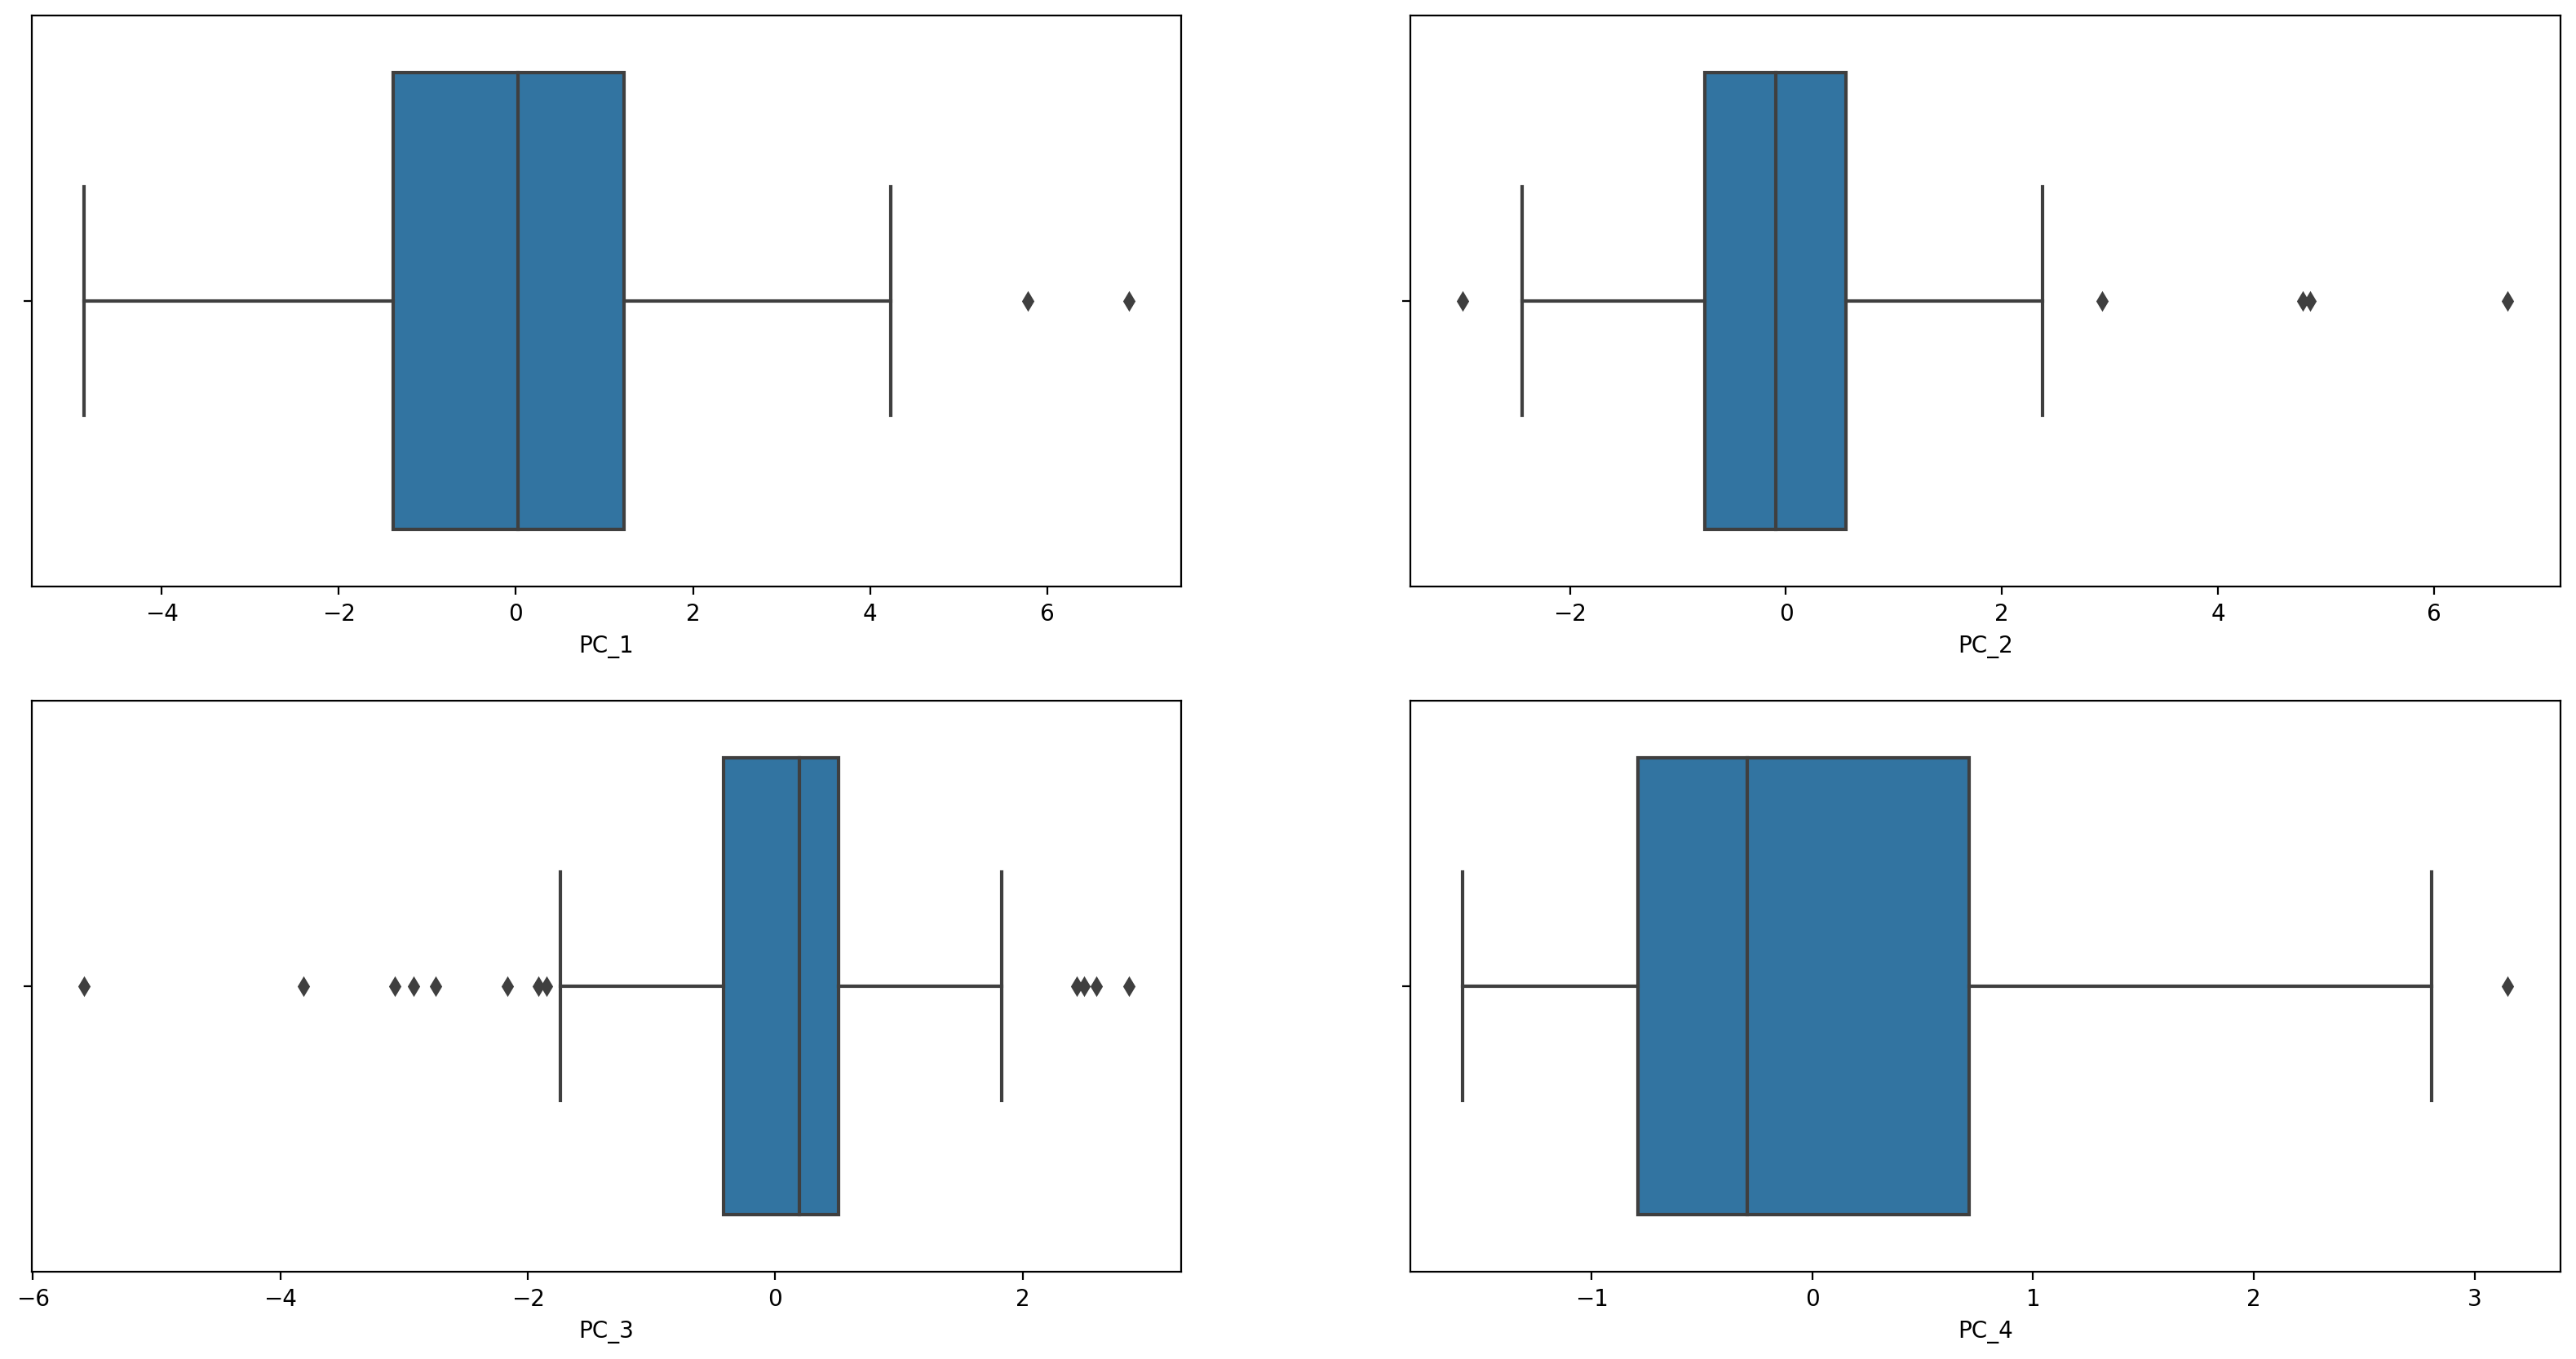

In [68]:
# Comprobamos los valores atípicos mediante un box-plot.

plt.figure(figsize=(20,10), dpi=200)

plt.subplot(2,2,1)
sns.boxplot(x = 'PC_1', data = df_pca_final)

plt.subplot(2,2,2)
sns.boxplot(x = 'PC_2', data = df_pca_final)

plt.subplot(2,2,3)
sns.boxplot(x = 'PC_3', data = df_pca_final)

plt.subplot(2,2,4)
sns.boxplot(x = 'PC_4', data = df_pca_final)


Dado que aún hay ruido, eliminaremos los datos en los extremos de los cuantiles. 

In [158]:
# Tratamos los valores atípicos para PC_1
Q1_1 = df_pca_final.PC_1.quantile(0.05)
Q3_1 = df_pca_final.PC_1.quantile(0.95)

In [159]:
# Tratamos los valores atípicos para PC_2
Q1_2 = df_pca_final.PC_2.quantile(0.05)
Q3_2 = df_pca_final.PC_2.quantile(0.95)

In [72]:
# Tratamos los valores atípicos para PC_4
Q1_4 = df_pca_final.PC_4.quantile(0.05)
Q3_4 = df_pca_final.PC_4.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1_1) & (df_pca_final.PC_1 <= Q3_1)]
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1_2) & (df_pca_final.PC_2 <= Q3_2)]
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1_3) & (df_pca_final.PC_3 <= Q3_3)]
df_pca_final = df_pca_final[(df_pca_final.PC_4 >= Q1_4) & (df_pca_final.PC_4 <= Q3_4)]

<Axes: xlabel='PC_4'>

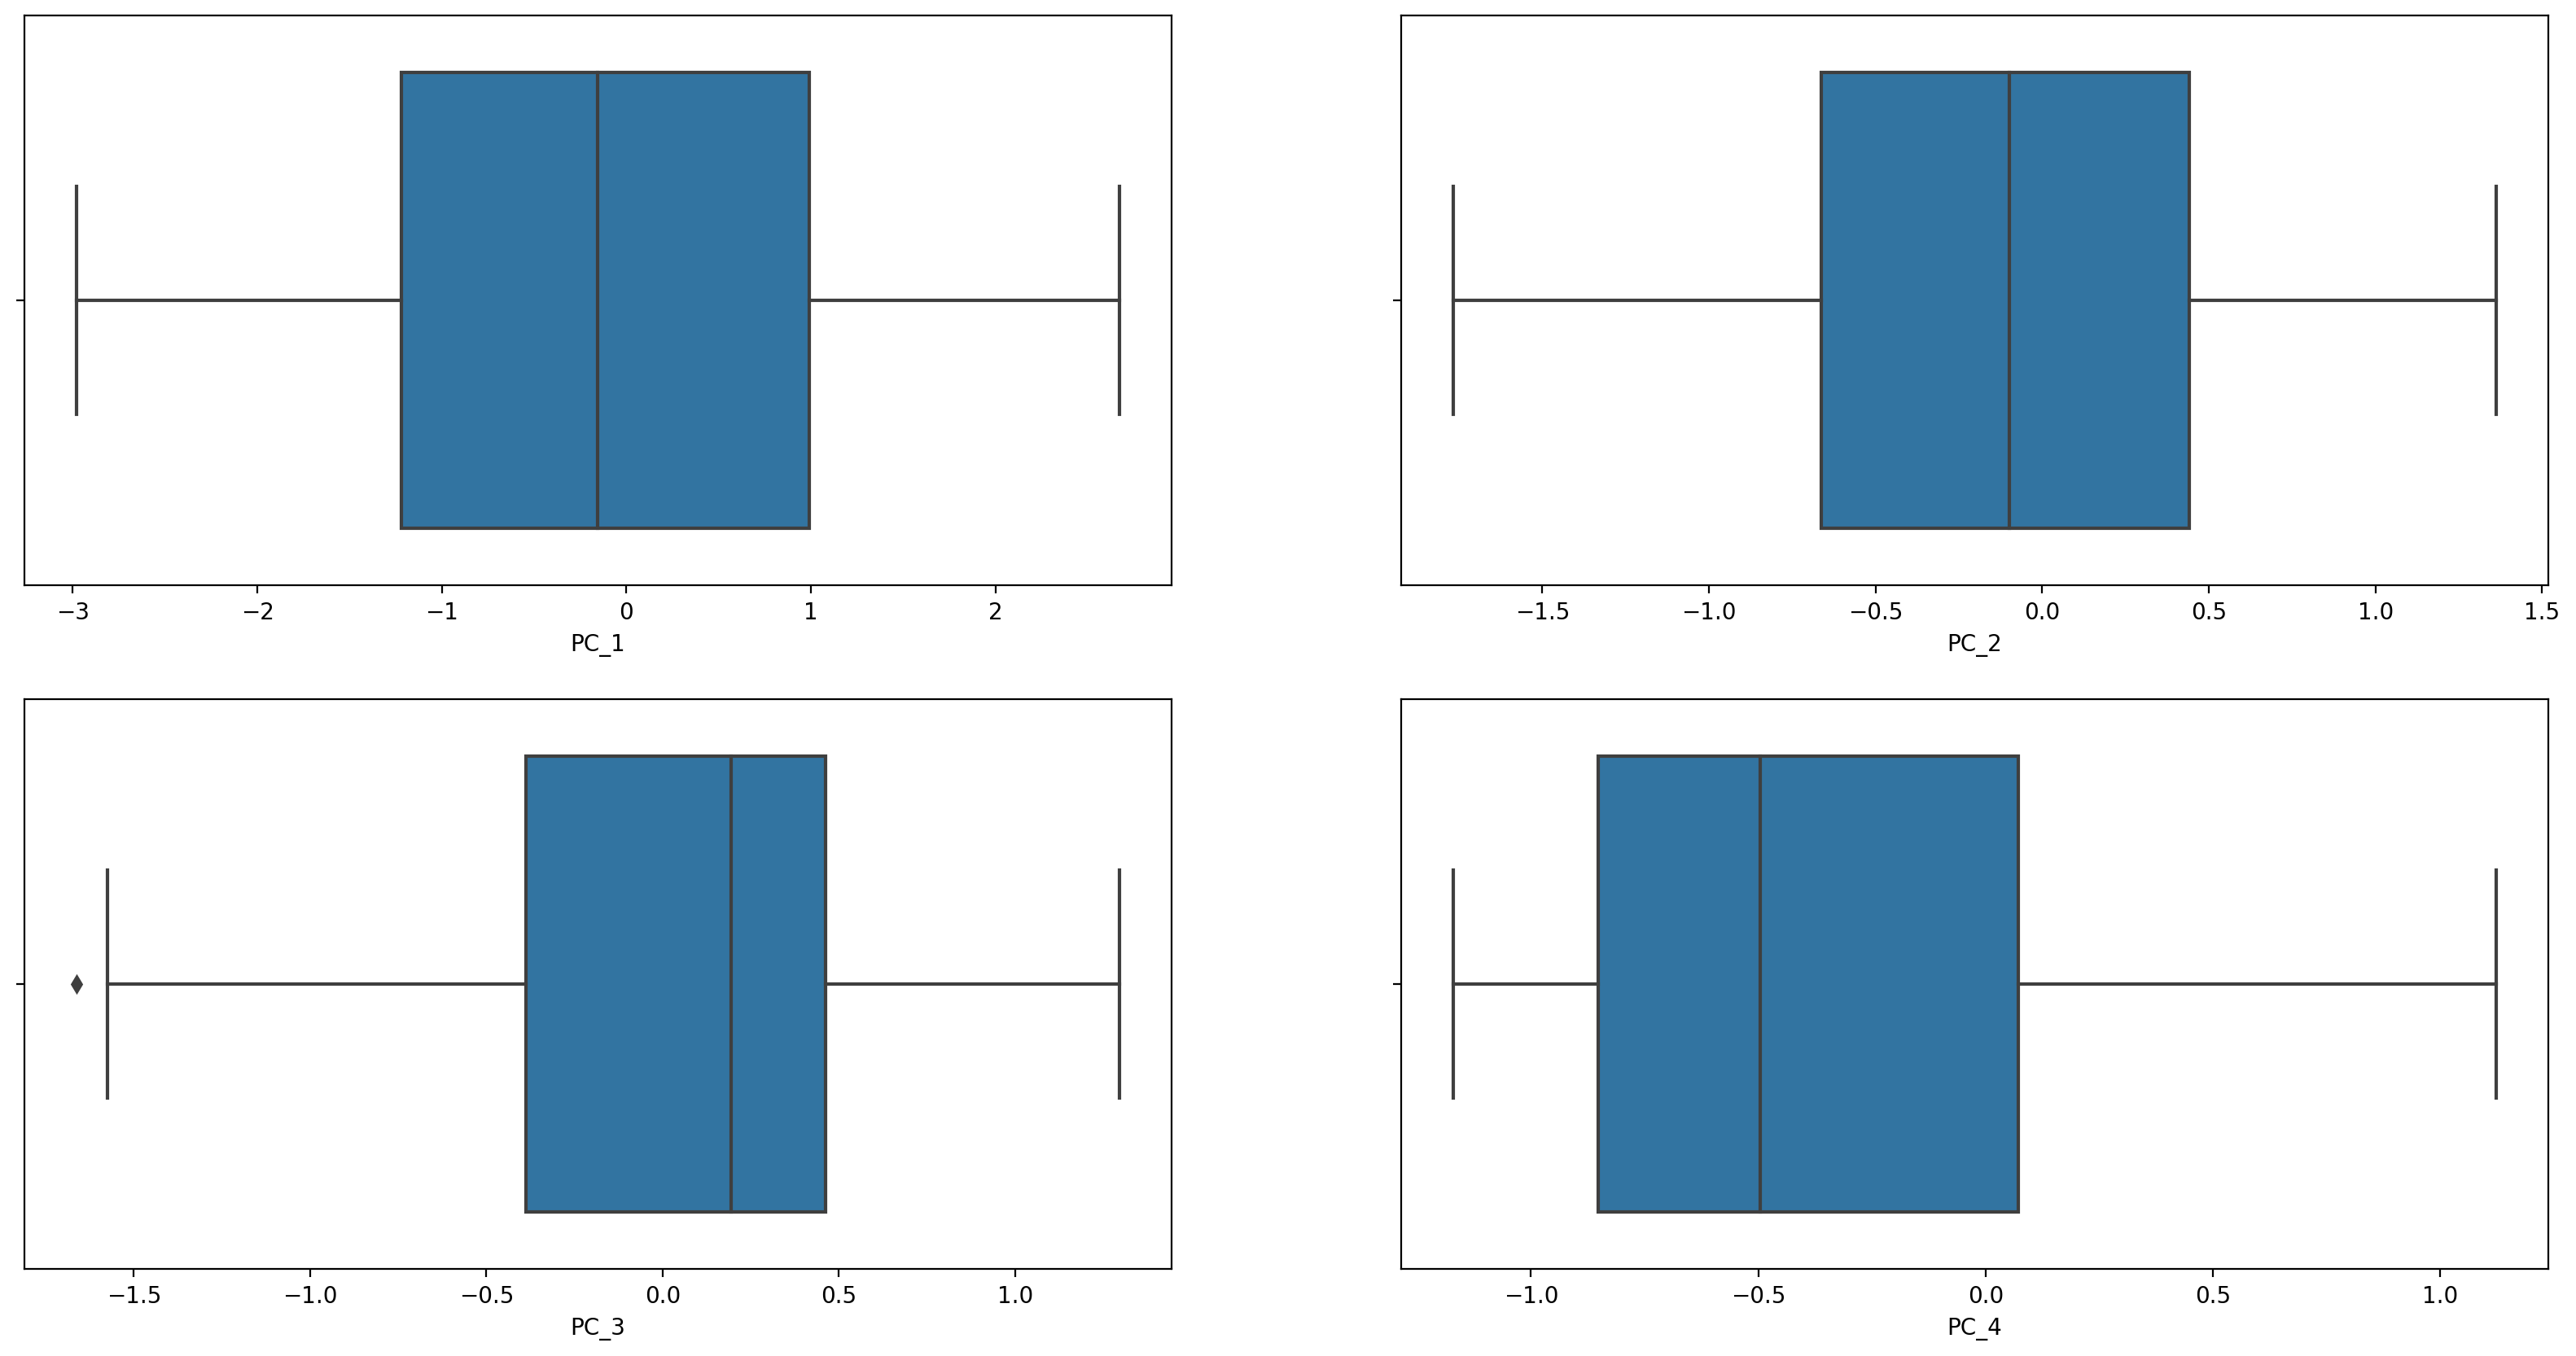

In [73]:
# Comprobamos los valores atípicos mediante un box-plot.

plt.figure(figsize=(20,10), dpi=200)

plt.subplot(2,2,1)
sns.boxplot(x = 'PC_1', data = df_pca_final)

plt.subplot(2,2,2)
sns.boxplot(x = 'PC_2', data = df_pca_final)

plt.subplot(2,2,3)
sns.boxplot(x = 'PC_3', data = df_pca_final)

plt.subplot(2,2,4)
sns.boxplot(x = 'PC_4', data = df_pca_final)


In [74]:
# Reindexamos el dataframe después de eliminar los valores atípicos
df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3,PC_4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808
4,Argentina,0.028470,-1.756721,-0.793520,-0.052486


Pasemos ahora a la fase de agrupamiento. Para ello, aplicaremos el k-medias. El primer paso es averiguar el número de clústers. 

In [81]:
df_pca_final

,country,PC_1,PC_2,PC_3,PC_4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808
4,Argentina,0.028470,-1.756721,-0.793520,-0.052486
...,...,...,...,...,...
102,Uruguay,0.617711,-1.430764,0.238559,-0.365984
103,Uzbekistan,-0.850918,-0.641211,-0.593362,-0.725943
104,Vanuatu,-0.822887,0.629074,0.343214,-0.701375
105,Yemen,-1.882505,-0.093454,-1.055348,0.056400


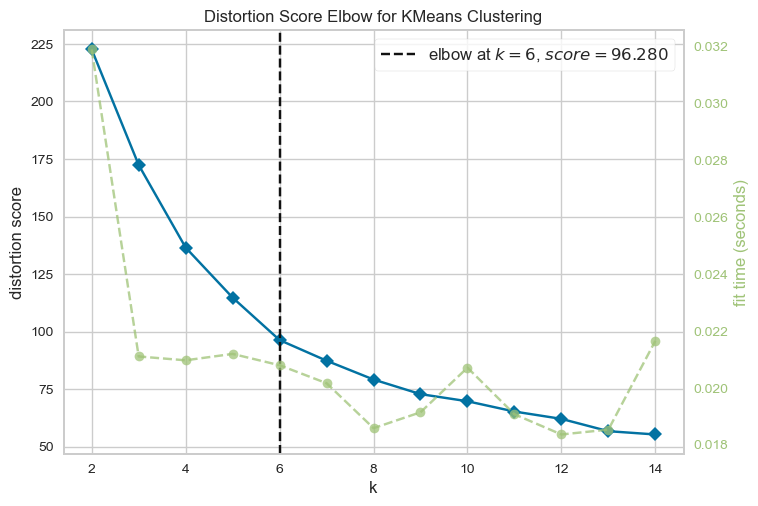

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(max_iter=100, init='random', n_init='auto', random_state=0)
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(df_pca_final_data)
visualizer.show()

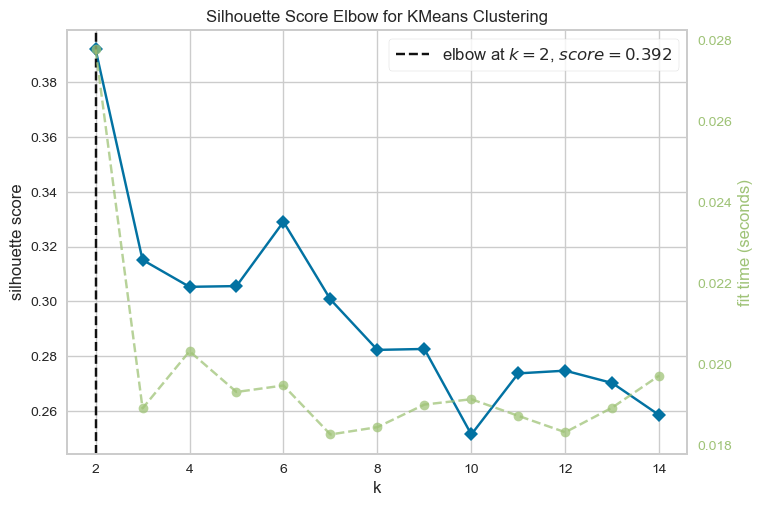

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [114]:
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')
visualizer.fit(df_pca_final_data)
visualizer.show()

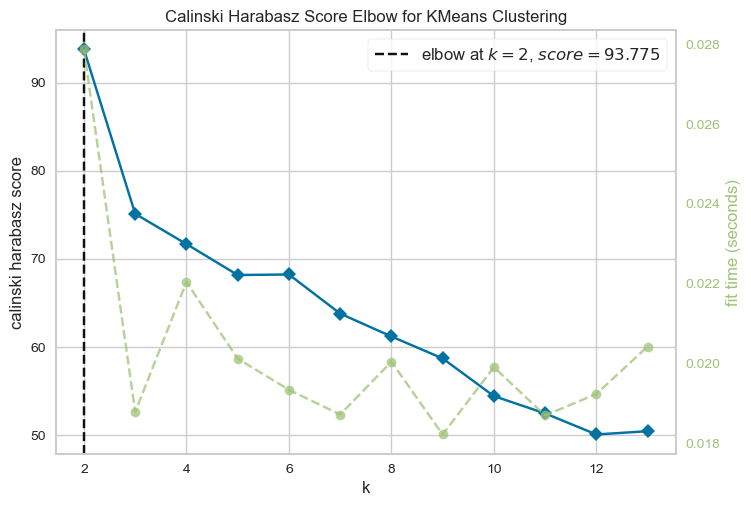

In [116]:
model = KMeans(init='random', n_init='auto', random_state=0)
visualizer = KElbowVisualizer(model, k=(2,14), metric='calinski_harabasz')
visualizer.fit(df_pca_final_data)
visualizer.show()
plt.show()

Probemos con k=2:

In [138]:
model = KMeans(n_clusters=2, max_iter=150, init='random', n_init='auto', random_state=100).fit(df_pca_final_data)

df_pca_final['Labels'] = model.labels_
df_pca_final['Labels'].value_counts()

1    61
0    46
Name: Labels, dtype: int64

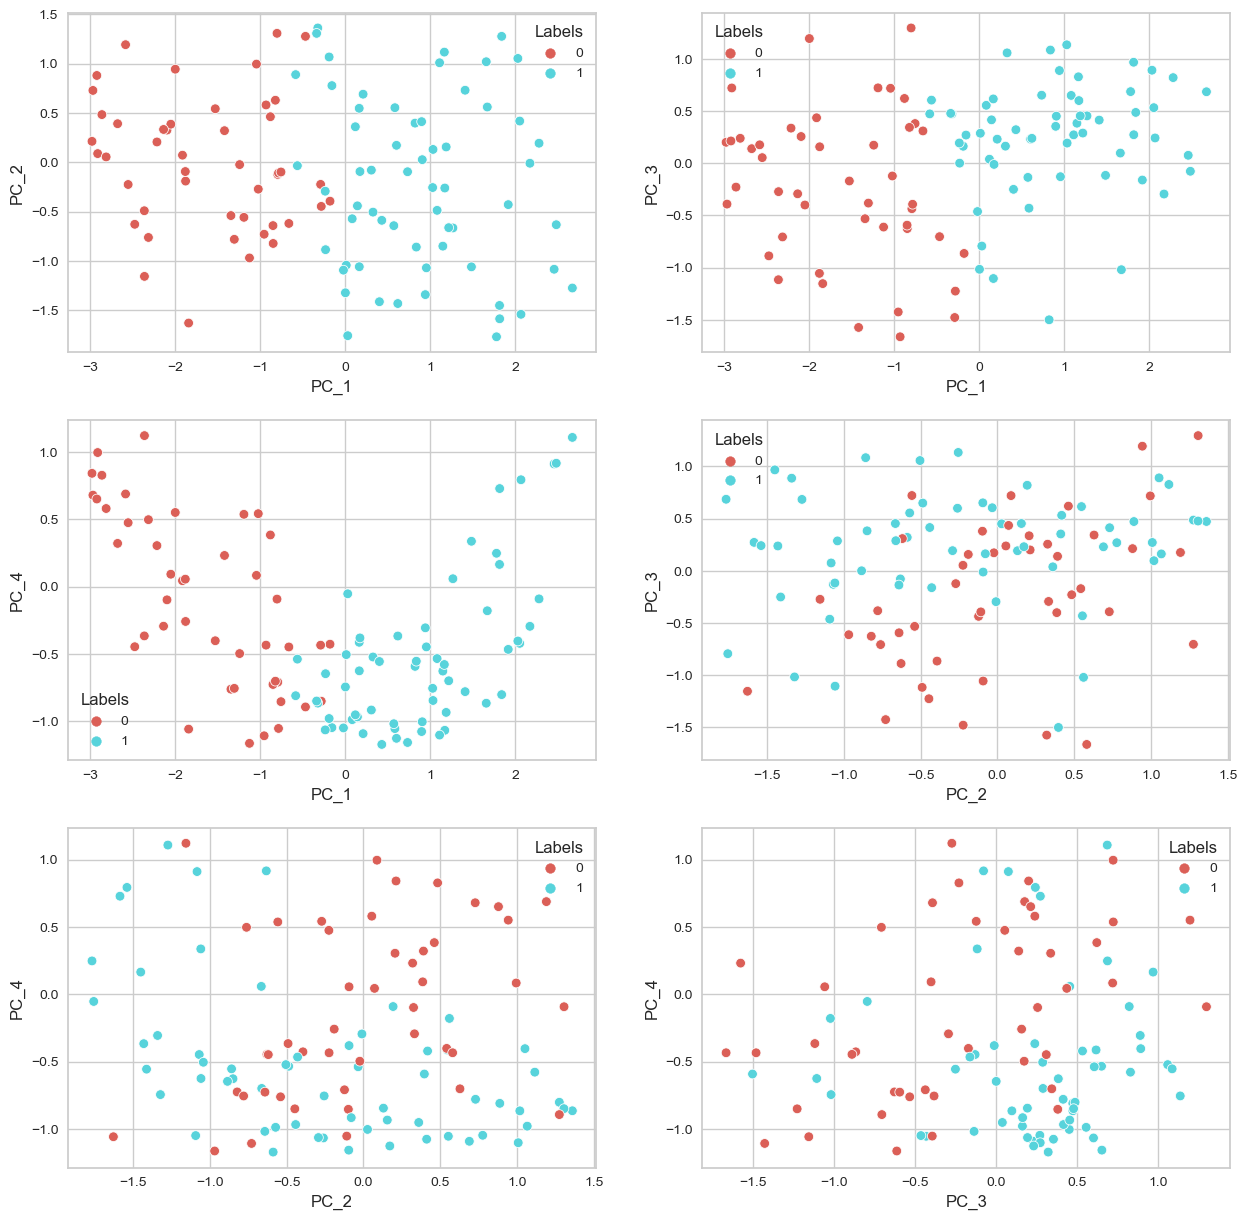

In [139]:

fig, axes = plt.subplots(3,2, figsize=(15,15))

sns.scatterplot(x='PC_1', y='PC_2', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 2),ax=axes[0][0])

sns.scatterplot(x='PC_1', y='PC_3', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 2),ax=axes[0][1])

sns.scatterplot(x='PC_1', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 2),ax=axes[1][0])

sns.scatterplot(x='PC_2', y='PC_3', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 2),ax=axes[1][1])

sns.scatterplot(x='PC_2', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 2),ax=axes[2][0])

sns.scatterplot(x='PC_3', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 2),ax=axes[2][1])

plt.show()

Las agrupaciones parecen correctas para las 2 primeras dimensiones, aunque menos acertadas para las demás. 
El repacto de los datos está desbalanceado, lo cual puede indicar la necesidad de añadir más clústeres. 

Probemos ahora con 4 clústers: 

In [140]:
model = KMeans(n_clusters=3, max_iter=150, init='random', n_init='auto', random_state=100).fit(df_pca_final_data)

df_pca_final['Labels'] = model.labels_
df_pca_final['Labels'].value_counts()

2    43
1    35
0    29
Name: Labels, dtype: int64

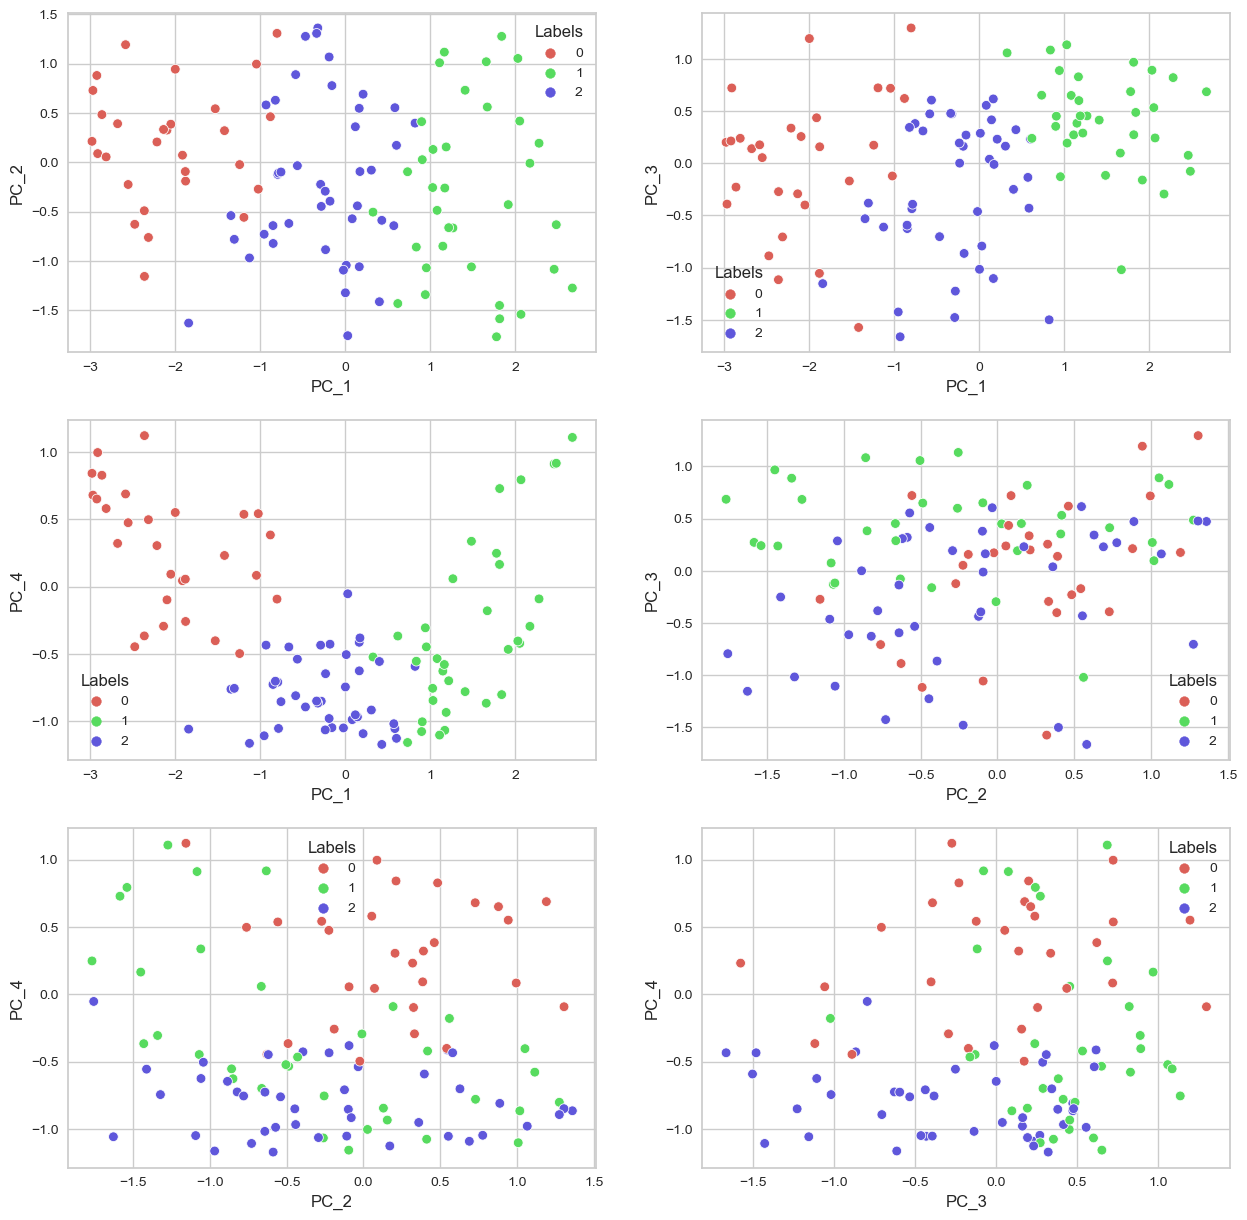

In [141]:
fig, axes = plt.subplots(3,2, figsize=(15,15))

sns.scatterplot(x='PC_1', y='PC_2', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 3),ax=axes[0][0])

sns.scatterplot(x='PC_1', y='PC_3', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 3),ax=axes[0][1])

sns.scatterplot(x='PC_1', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 3),ax=axes[1][0])

sns.scatterplot(x='PC_2', y='PC_3', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 3),ax=axes[1][1])

sns.scatterplot(x='PC_2', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 3),ax=axes[2][0])

sns.scatterplot(x='PC_3', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 3),ax=axes[2][1])

plt.show()

No se aprecia una importante mejora. Sí se aprecia una nueva segmentación entre la PC_1 y la PC_2, y entre la PC_1 y la PC_3. 
Probemos ahora con 4:

In [142]:
model = KMeans(n_clusters=4, max_iter=150, init='random', n_init='auto', random_state=100).fit(df_pca_final_data)

df_pca_final['Labels'] = model.labels_
df_pca_final['Labels'].value_counts()

1    36
0    28
3    22
2    21
Name: Labels, dtype: int64

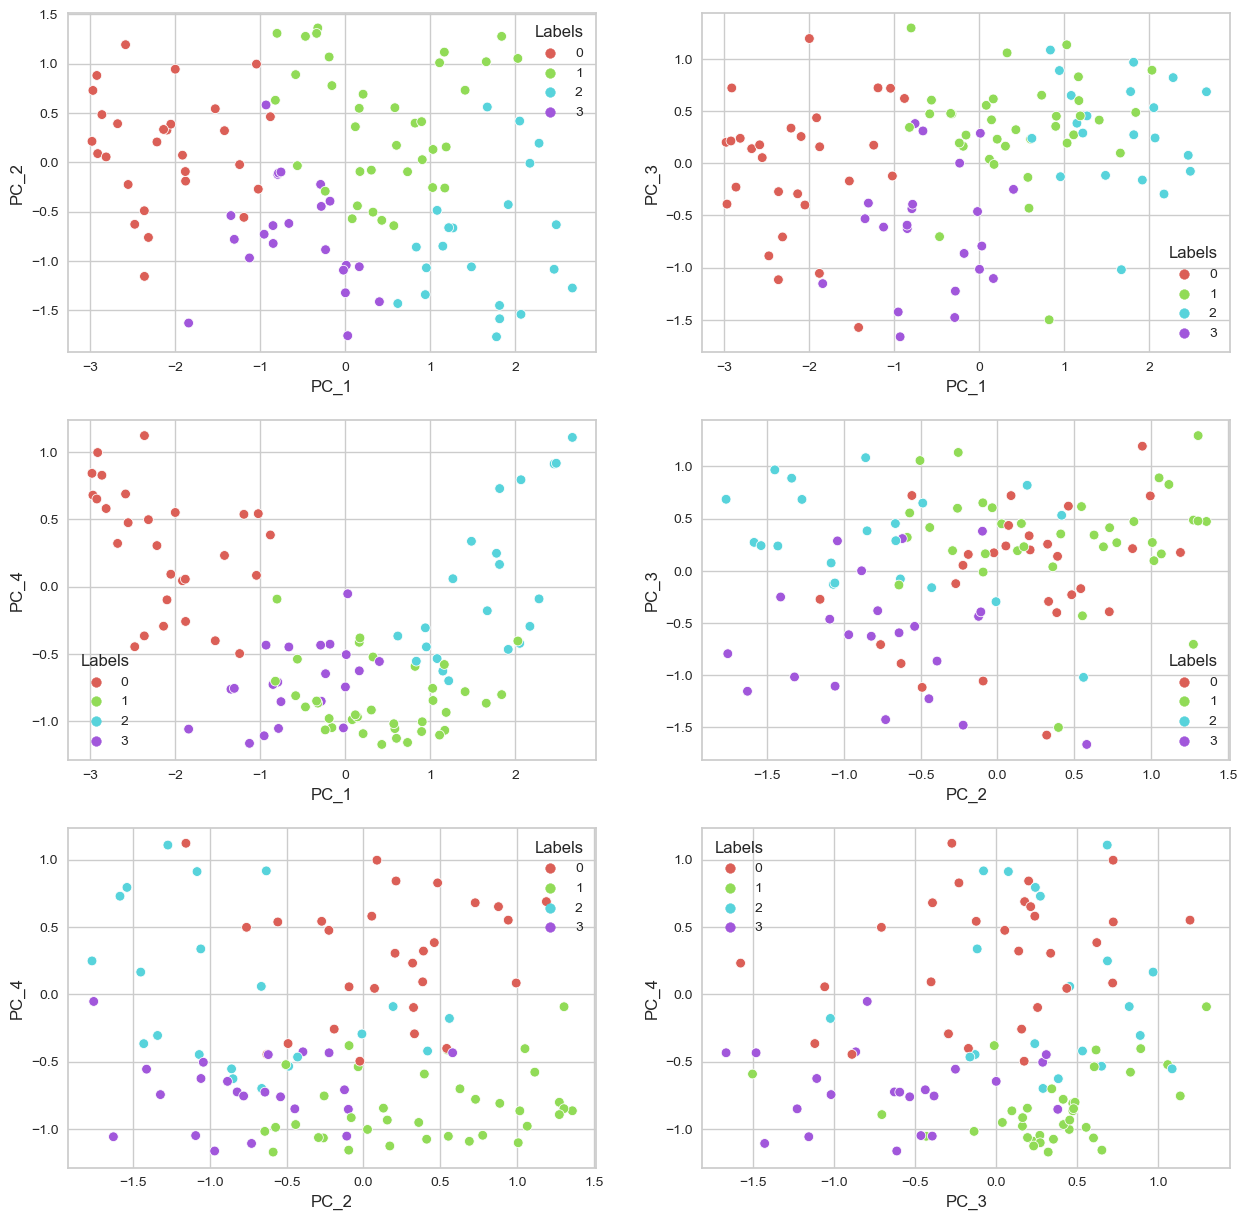

In [143]:
fig, axes = plt.subplots(3,2, figsize=(15,15))

sns.scatterplot(x='PC_1', y='PC_2', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 4),ax=axes[0][0])

sns.scatterplot(x='PC_1', y='PC_3', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 4),ax=axes[0][1])

sns.scatterplot(x='PC_1', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 4),ax=axes[1][0])

sns.scatterplot(x='PC_2', y='PC_3', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 4),ax=axes[1][1])

sns.scatterplot(x='PC_2', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 4),ax=axes[2][0])

sns.scatterplot(x='PC_3', y='PC_4', data=df_pca_final, hue='Labels', 
                palette=sns.color_palette('hls', 4),ax=axes[2][1])

plt.show()

Siguen sin aparecer mejoras significativas en la agrupación o segmentación de los datos. Únicamente se mejora el balanceo de datos entre los distintos clústeres.

Hasta ahora hemos visto cómo quedan los datos respecto a los componentes principales, pero ¿cómo quedarían en los datos reales? Visualicémoslo (para k=2): 

In [149]:
model = KMeans(n_clusters=2, max_iter=150, init='random', n_init='auto', random_state=100).fit(df_pca_final_data)
df_pca_final['Labels'] = model.labels_

# Mezclemos los datos originales con los del PCA
df_merge = pd.merge(ngo,df_pca_final, on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Labels']]
df_merge.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC_1,PC_2,PC_3,PC_4,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,1
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0.028470,-1.756721,-0.793520,-0.052486,1


In [152]:
# Creemos el dfs con los valores medios
cluster_child = pd.DataFrame(df_merge_col.groupby(["Labels"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Labels"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Labels"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Labels"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Labels"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Labels"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Labels"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Labels"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Labels"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1]), cluster_child, cluster_export, cluster_import, cluster_health, cluster_income,
                       cluster_inflation, cluster_lifeexpec, cluster_totalfer, cluster_gdpp], axis=1)
df_concat.columns = ["Labels", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Labels,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,61.313043,29.579978,37.414476,5.308043,5286.913043,10.514022,64.115217,3.979783,2323.608696
1,1,13.970492,44.032787,49.214754,7.267049,18121.147541,4.434820,75.359016,2.040492,12759.278689


Del análisis anterior, podemos concluir que la mortalidad infantil, el income y el gdpp son tres de los principales factores que deciden el desarrollo del país. También hemos comprobado a través de los componentes principales que esas variables tienen puntuación alta en PCA.  Por ello, vamos a proceder a analizar estos 3 componentes para construir clústeres con mayor significado. 

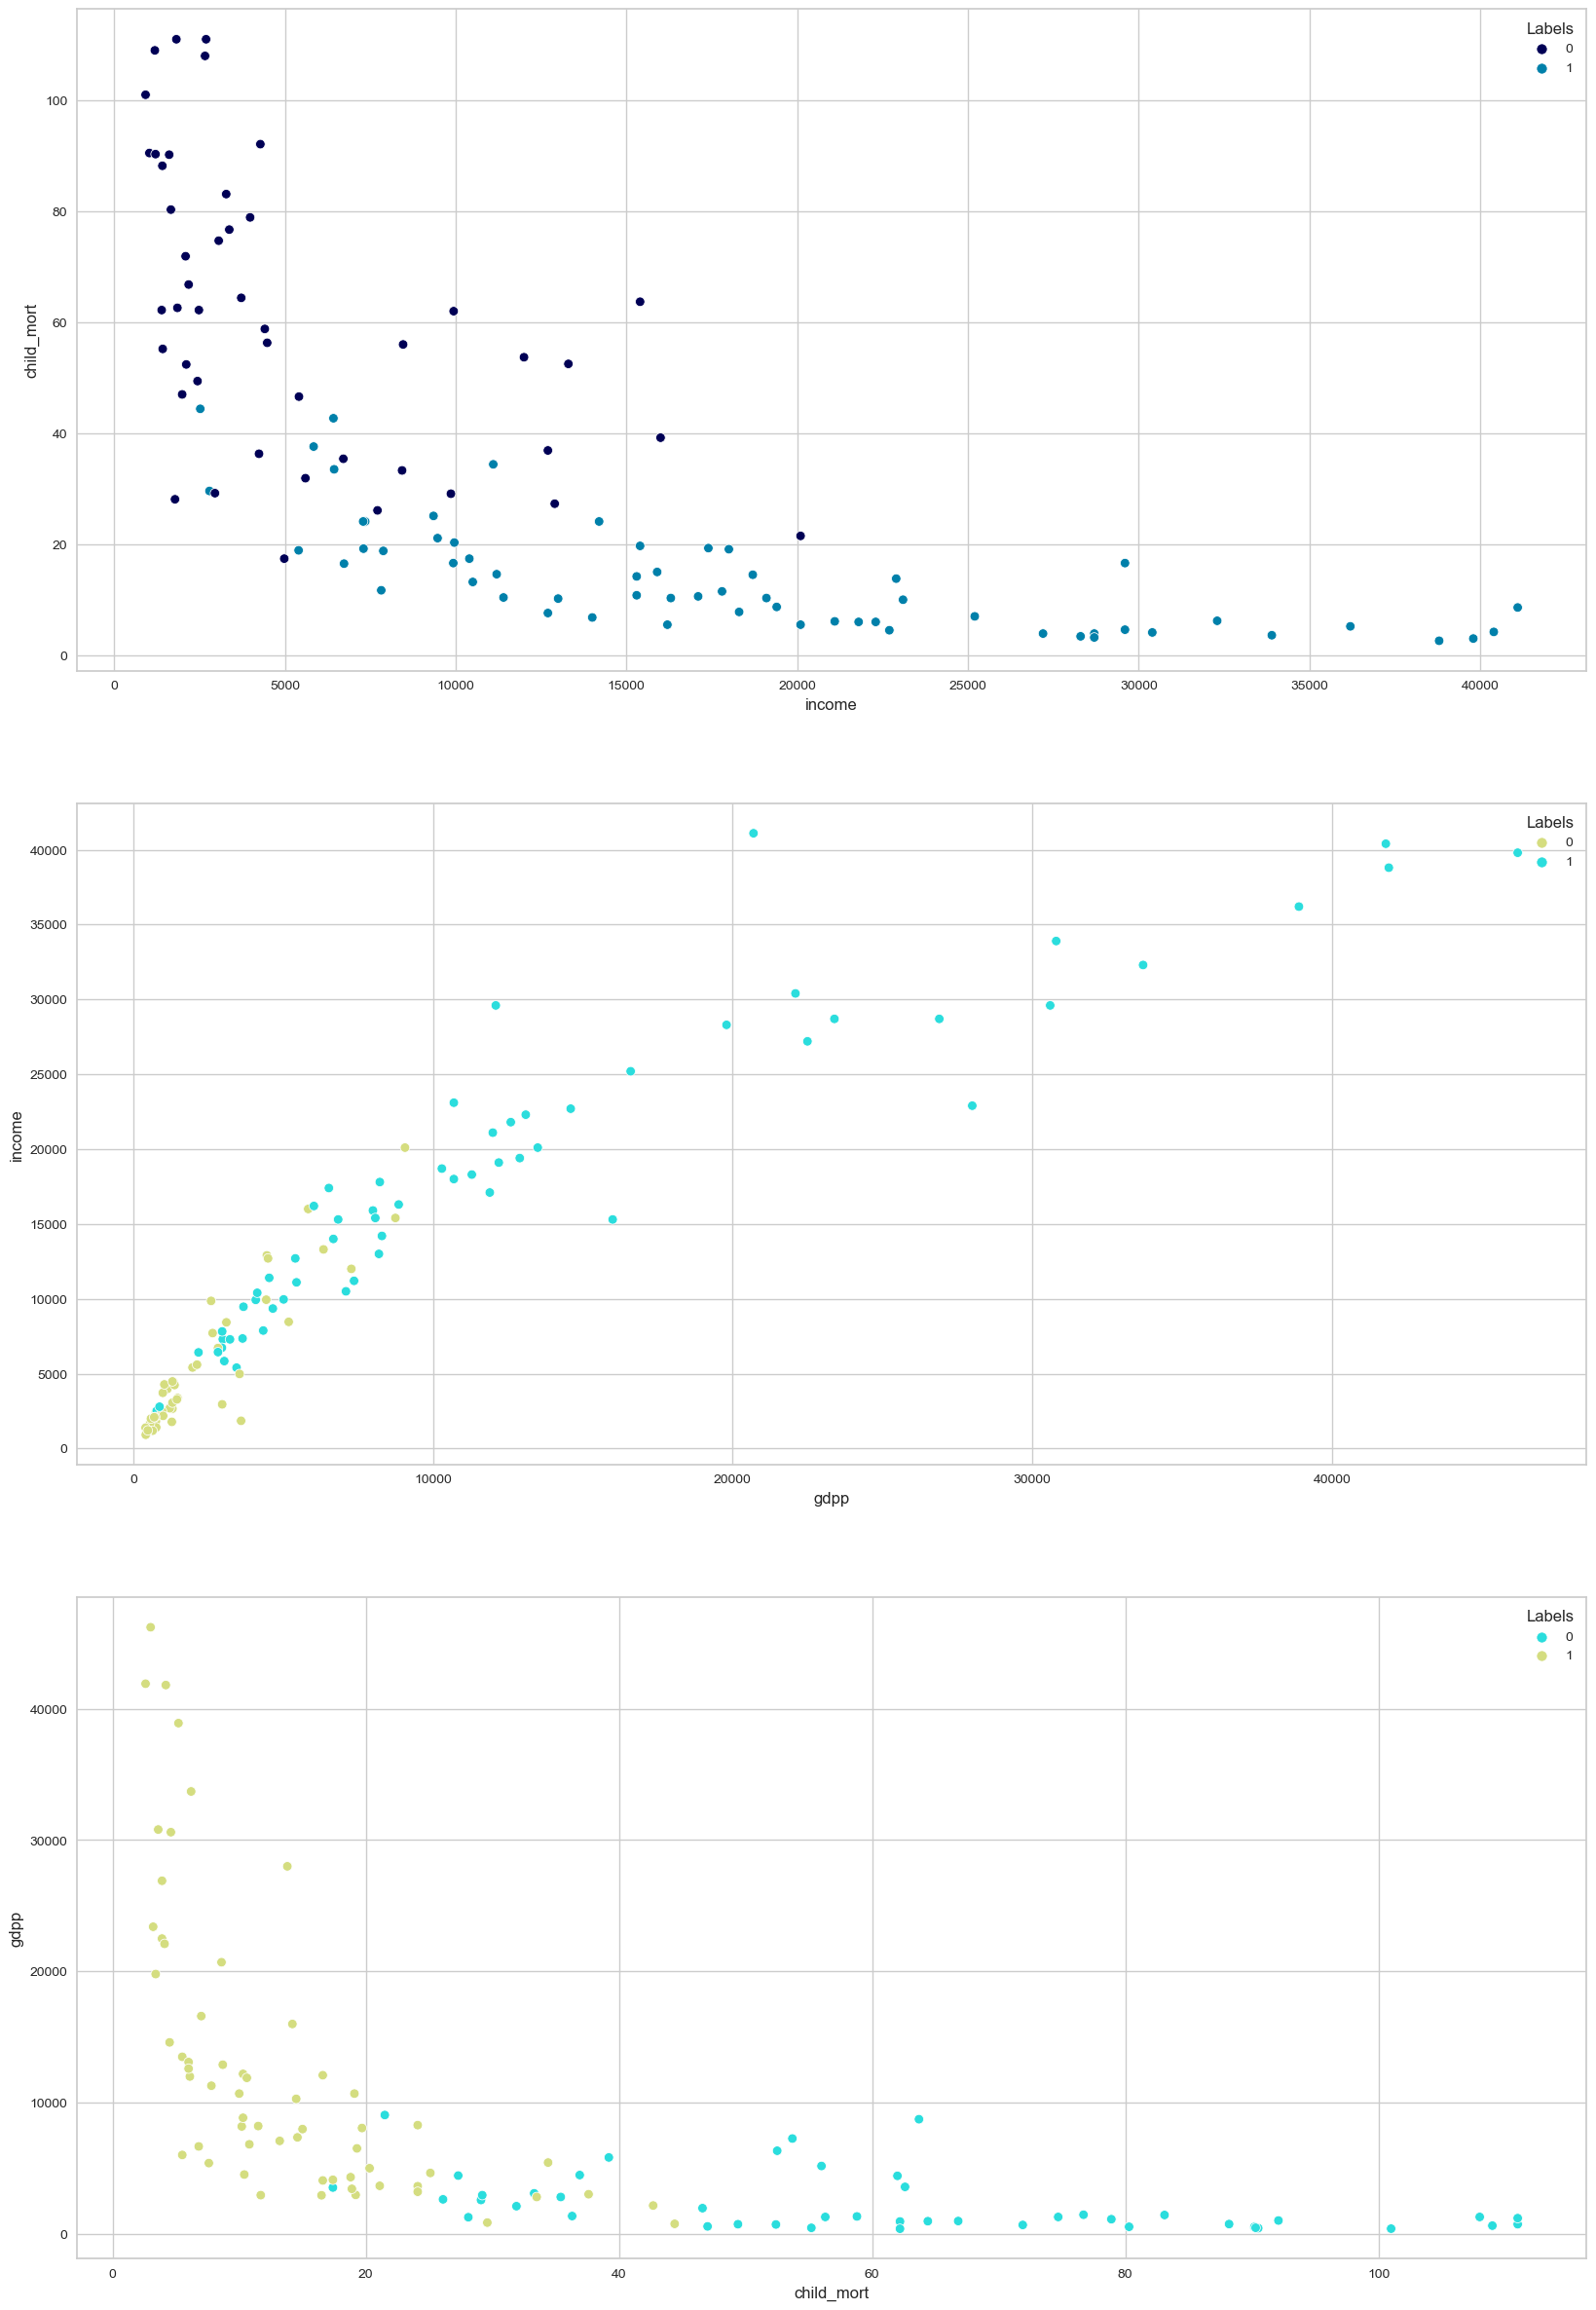

In [154]:
plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue='Labels',data = df_merge_col, legend='full', palette="ocean")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue='Labels', data = df_merge_col, legend='full', palette="rainbow_r")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue='Labels', data=df_merge_col, legend='full', palette="rainbow")
plt.show()

Representemos los gráficos de caja para visualizar cómo se agrupan los datos: 

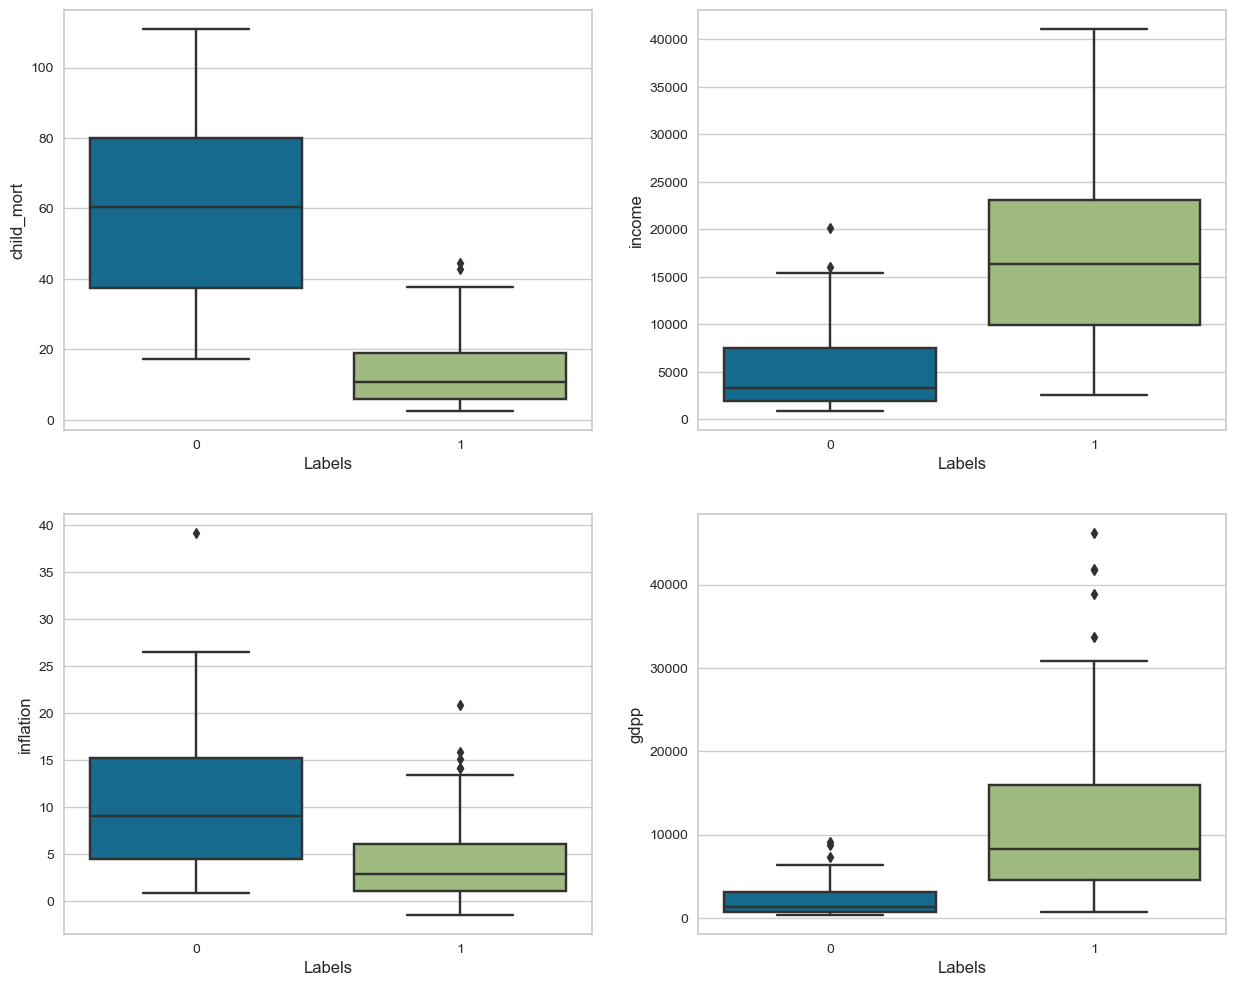

In [155]:
#Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))


sns.boxplot(x = 'Labels', y = 'child_mort', data = df_merge_col, ax=axes[0][0])
sns.boxplot(x = 'Labels', y = 'income', data = df_merge_col, ax=axes[0][1])
sns.boxplot(x = 'Labels', y = 'inflation', data = df_merge_col, ax=axes[1][0])
sns.boxplot(x = 'Labels', y = 'gdpp', data = df_merge_col, ax=axes[1][1])

plt.show()

Podemos apreciar que la mortalidad infantil es mayor en el clúster 0. Asimismo, se aprecia que ese mismo clúster tiene menores ingresos, a la vez que mayor inflación y menos renta per cápita, los cuales son indicadores de bajo desarrollo económico. En base a este análisis, los países del clúster 0 son los que necesitan más ayuda. 

In [156]:
# Países del Cluster 0
df_merge_col[df_merge_col['Labels']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.000,44.9000,7.58,1610,9.440,56.2,5.82,553,0
2,Algeria,27.3,38.400,31.4000,4.17,12900,16.100,76.5,2.89,4460,0
5,Azerbaijan,39.2,54.300,20.7000,5.88,16000,13.800,69.1,1.92,5840,0
8,Bangladesh,49.4,16.000,21.8000,3.52,2440,7.140,70.4,2.33,758,0
12,Benin,111.0,23.800,37.2000,4.10,1820,0.885,61.8,5.36,758,0
14,Bolivia,46.6,41.200,34.3000,4.84,5410,8.780,71.6,3.20,1980,0
15,Botswana,52.5,43.600,51.3000,8.30,13300,8.920,57.1,2.88,6350,0
18,Cameroon,108.0,22.200,27.0000,5.13,2660,1.910,57.3,5.11,1310,0
20,Comoros,88.2,16.500,51.7000,4.51,1410,3.870,65.9,4.75,769,0
22,Cote d'Ivoire,111.0,50.600,43.3000,5.30,2690,5.390,56.3,5.27,1220,0
